# Traffic Sign Classifier

Project 2 for the Udacity Self-Driving Car Nanodegree, January 2017 Cohort

by Graham Arthur Mackenzie

(Please see GAM_Traffic_Sign_Classifier_Writeup.ipynb for an explanation of how this project satisfies all the submission criteria.)

1 - Load pickled data.

In [1]:
# Load pickled data
import pickle

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

2 - Provide a basic summary of our datasets. [This satisfies rubric criterion Dataset Summary.]

In [2]:
# Provide a basic summary of the data
# capture all values dynamically
import numpy as np

# capture the number of training examples
n_train = X_train.shape[0]

# capture the number of validation examples
n_valid = X_valid.shape[0]

# capture the number of test examples
n_test = X_test.shape[0]

# capture the array shape of a single traffic sign image
image_shape = X_train.shape[1:]

# capture the number of unique classes/labels in the dataset
n_classes = len(np.unique(y_train))

# print out results of the above
print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


3 - Provide an exploratory visualization of the dataset. Part A: Bar chart showing the count of each class ID. [This cell and cell 4 satisfy the rubric criterion Exploratory Visualization.]

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


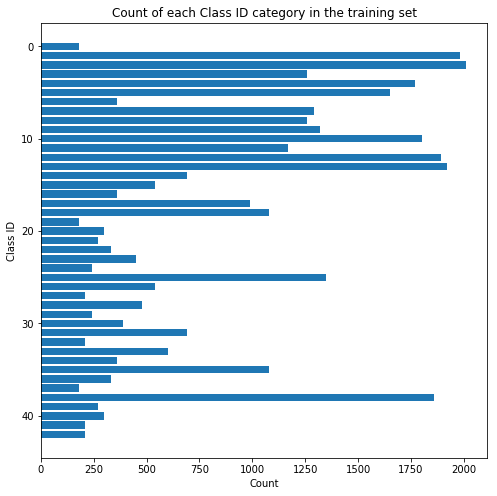

In [3]:
# Provide an exploratory visualization of the dataset
# Part A: Bar chart showing the count of each class
import matplotlib.pyplot as plt
%matplotlib inline

counter = 0
# class_id_counts is initialized as an array of 0's, 43 positions long, one for each class
# the value at each position is intended to hold the count of that class ID
train_id_counts = 43 * [0]
# train_indices is intitialized as a list of blank lists, 43 positions long, one for each class ID
# the list at each of these positions is intended to hold the indexes of all members of 
# that class ID, to be used later in balance_class
train_indices = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
             [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

# go through every member of the training dataset, starting at 0
while counter < n_train:
    # grab the class ID of dataset member 'counter' from y_train
    class_id = y_train[counter]
    # increase the count of this class ID by 1
    train_id_counts[class_id] = train_id_counts[class_id] + 1
    # add dataset member 'counter' to the list of indices of that class ID
    train_indices[class_id].append(counter)
    counter += 1
    
print(train_id_counts)

# set variables for spacing on the y axis of the bar graph
counts = tuple(i for i in range(43))
y_pos = np.arange(len(counts)) 

# create the bar graph
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.barh(y_pos, train_id_counts)
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_ylabel('Class ID')
ax.set_title('Count of each Class ID category in the training set')

# show the graph
plt.show()

4 - The first thing we notice is how unbalanced the training dataset is. (We assume that the validation and test sets are similarly unbalanced.) This will be addressed later on.

Before that, let's continue our exploratory visualization. I, personally, would find it very helpful to see a randomly chosen example of each class ID, so I hope you will as well, dear reader. : ) Part B: dynamically create a grid of randomly chosen examples of each class ID.

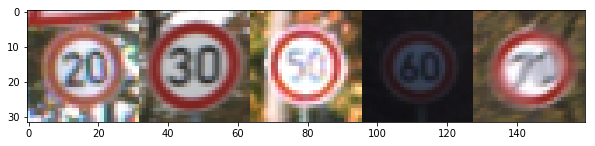

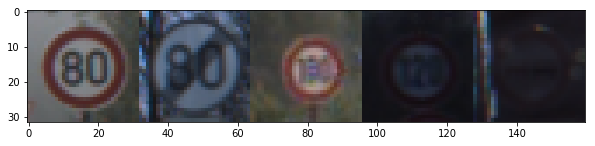

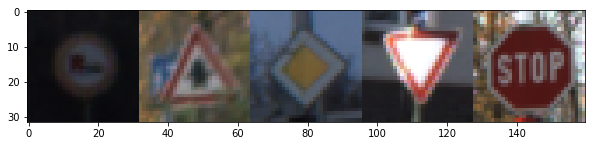

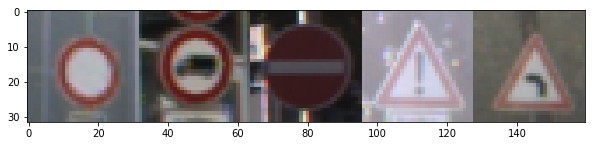

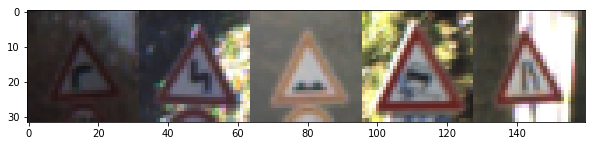

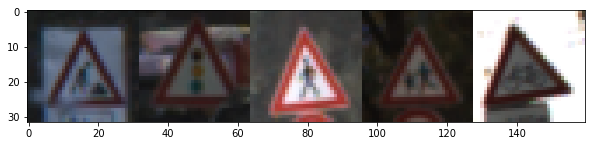

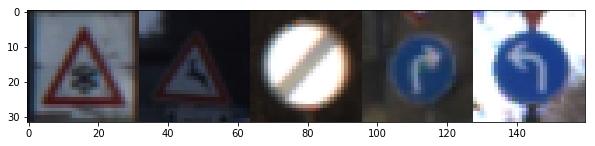

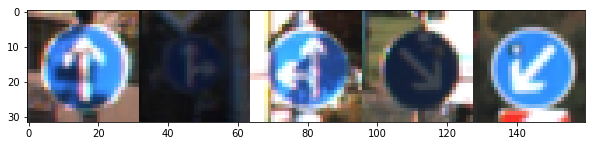

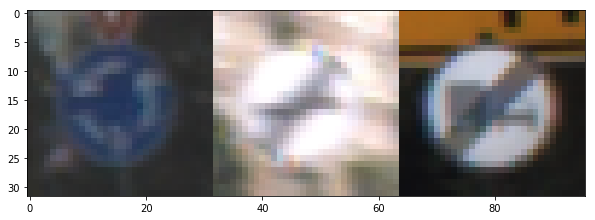

In [4]:
# Provide an exploratory visualization of the dataset
# Part B: create a grid displaying a randomly chosen 
# example of each Class ID in increasing order

import random

counter = 0
image_array = []

# starting at 0, go through every class ID
while counter < n_classes:
    # choose a random member index number from
    # the list belonging to that class ID
    # put that image in image_array to be used below
    rando = random.choice(train_indices[counter])
    image = X_train[rando].squeeze()
    image_array.append(image)
    counter += 1

x_var = 0
y_var = 5

# do the following 9 times
for i in range(9):
    # concatenate the next 5 images into one image
    # and display it
    res = np.concatenate(image_array[x_var:y_var], axis=1)
    plt.figure(figsize=(10,10))
    plt.imshow(res)
    # update all vars
    x_var += 5
    y_var += 5

plt.show()

5 - Before we train our model on our images, we need to preprocess them. The methods we have chosen for this are grayscaling and normalization (because Yann LeCun and the class materials and my Forum Mentors said I should, ha. But actually because removing the color gives our classifier one less uninformative vector to have to take into consideration because color is a distinguishing feature between two unique traffic sign representations in only a fraction of the use cases.)  [This satisfies rubric criterion Preprocessing.] Here is a demonstration of these processes:

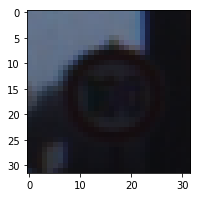

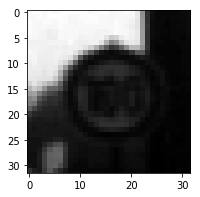

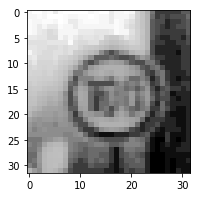

In [5]:
import cv2

# choose an image from the set at random
rando = random.choice(range(len(X_train)))

# display image
image = X_train[rando].squeeze()
plt.figure(figsize=(3,3))
plt.imshow(image)

# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(3,3))
plt.imshow(gray, cmap='gray')

# normalize the image
equ = cv2.equalizeHist(gray)
plt.figure(figsize=(3,3))
plt.imshow(equ, cmap='gray')

plt.show()

6 - We put the above into a function. This function includes a call to another function, reshape(), which is necessary to do to the arrays after they have been grayscaled and normalized.

In [6]:
def preprocess(x):
    result_array = []
    for pic in x:
        gray = cv2.cvtColor(pic, cv2.COLOR_RGB2GRAY)
        equ = cv2.equalizeHist(gray)
        result_array.append(equ)
    result = reshape(result_array)
    return result

def reshape(x):
    return np.reshape(x, (-1, 32, 32, 1))


7 - And then we run all three datasets through this process.

In [7]:
X_train_pp = preprocess(X_train)
X_valid_pp = preprocess(X_valid)
X_test_pp = preprocess(X_test)

8 - Let's look at a randomly chosen image from each dataset to make sure the preprocess worked as planned.

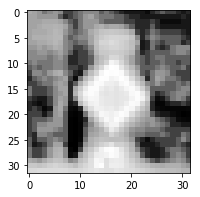

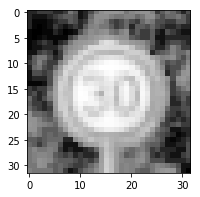

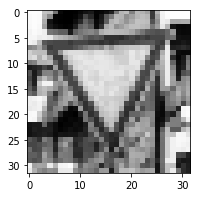

In [8]:
rando1 = random.choice(range(len(X_train_pp)))
rando2 = random.choice(range(len(X_valid_pp)))
rando3 = random.choice(range(len(X_test_pp)))

image1 = X_train_pp[rando1].squeeze()
plt.figure(figsize=(3,3))
plt.imshow(image1, cmap='gray')

image2 = X_valid_pp[rando2].squeeze()
plt.figure(figsize=(3,3))
plt.imshow(image2, cmap='gray')

image3 = X_test_pp[rando3].squeeze()
plt.figure(figsize=(3,3))
plt.imshow(image3, cmap='gray')

plt.show()

9 - Looks good! And now, with all three datasets preprocessed, we are ready to talk about our model and train it on our images.

Our model is a direct port of the LeNet image classification model (designed by Yann LeCun) demonstrated in recent lessons; only a handful of the parameters have been slightly tweaked to accept our traffic sign dataset. Also, average pools were used in place of max pools.

The model consists of the following Layers:<br>
Layer 1: <br>
Convolutional. Input = 32x32x1. Output = 28x28x6.<br>
Activation.<br>
Pooling. Input = 28x28x6. Output = 14x14x6. (2x2 stride, valid padding)<br>
Layer 2:<br>
Convolutional. Input = 14x14x6. Output = 10x10x16.<br>
Activation.<br>
Pooling. Input = 10x10x16. Output = 5x5x16. (2x2 stride, valid padding)<br>
Flatten. Input = 5x5x16. Output = 400.<br>
Layer 3: <br>
Fully Connected. Input = 400. Output = 120.<br>
Activation.<br>
Layer 4: Fully Connected. Input = 120. Output = 84.<br>
Activation.<br>
Layer 5: Fully Connected. Input = 84. Output = 43.<br>

[This satisfies the rubric criterion Model Architecture.]

Here is a figure demonstrating a high-level depiction of the model:

<img src="lenet.png">

10 - And here is the model implementation:

In [9]:
# Our implementation of Yann LeCun's LeNet architecture
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

11 - Now we train our model. We keep most all the parameters (namely AdamOptimizer and the hyperparameter values) as they were set in LeNet. Via trial and error, we have learned that a learning rate of 0.001 and a batch size of 32 (being a multiple of 2) work best, and that 30 Epochs is typically more than enough to get to the necessary accuracy of 93% on the validation set (I leave in more Epochs than necessary because I feel uncomfortable choosing exactly which Epoch to stop at. Ideally, I would be able to show the client printouts from a handful of runs and ask them where within that range they'd like me to halt process. I have no idea if this approach is practicable in real life, ha.)

[This cell satisfies the Model Training rubric criterion.]

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [11]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [13]:
from sklearn.utils import shuffle

rate = 0.001
EPOCHS = 30
BATCH_SIZE = 32

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_pp)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_pp, y_train = shuffle(X_train_pp, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_pp[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_pp, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.860

EPOCH 2 ...
Validation Accuracy = 0.857

EPOCH 3 ...
Validation Accuracy = 0.883

EPOCH 4 ...
Validation Accuracy = 0.913

EPOCH 5 ...
Validation Accuracy = 0.920

EPOCH 6 ...
Validation Accuracy = 0.904

EPOCH 7 ...
Validation Accuracy = 0.916

EPOCH 8 ...
Validation Accuracy = 0.924

EPOCH 9 ...
Validation Accuracy = 0.920

EPOCH 10 ...
Validation Accuracy = 0.919

EPOCH 11 ...
Validation Accuracy = 0.927

EPOCH 12 ...
Validation Accuracy = 0.927

EPOCH 13 ...
Validation Accuracy = 0.926

EPOCH 14 ...
Validation Accuracy = 0.932

EPOCH 15 ...
Validation Accuracy = 0.924

EPOCH 16 ...
Validation Accuracy = 0.923

EPOCH 17 ...
Validation Accuracy = 0.936

EPOCH 18 ...
Validation Accuracy = 0.932

EPOCH 19 ...
Validation Accuracy = 0.942

EPOCH 20 ...
Validation Accuracy = 0.884

EPOCH 21 ...
Validation Accuracy = 0.934

EPOCH 22 ...
Validation Accuracy = 0.933

EPOCH 23 ...
Validation Accuracy = 0.907

EPOCH 24 ...
Validation Accura

12 - As can be seen, this model trained on this training dataset achieved 93% on the validation dataset [thereby satisfying the Solution Approach rubric criterion.] In other words, I could have handed this in two weeks ago right at this point, hahaha! But I press on!

I wanted to do better, so I attempted to modify the above model so that it would resemble the enhanced version of LeNet (essentially) described in "Traffic Sign Recognition with Multi-Scale Convolutional Networks" by Pierre Sermanet and Yann LeCun. (http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)

Here is an image from that paper which describes this enhanced Model Architecture:

<img src="lenet2.png">

13 - As can be seen by comparing the two figures, the modifications consisted of:
- adding a third convolution prior to full connection
- separating out the results of the second convolution so that it can be directly fed into the full connection alongside the original data flow (this, according to LeCun + Sermanet (II A), is done "to provide different scales of receptive fields to the classifier. In the case of 2 stages of features, the second stage extracts “global” and invariant shapes and structures, while the first stage extracts “local” motifs with more precise details.")

As further enhancements, I added (after much trial and error) two Dropout layers: one after each of the primary Convolution layers.

A description of the Layers of the final model:<br>
Layer 1: <br>
Convolutional. Input = 32x32x6. Output = 28x28x6.<br>
Activation.<br>
Pooling. Input = 28x28x6. Output = 14x14x6. (2x2 stride, valid padding)<br>
Dropout layer 1. (conv1, 0.5)<br>
Layer 2: <br>
Convolutional. Output = 10x10x16.<br>
Activation.<br>
Pooling. Input = 10x10x16. Output = 5x5x16. (2x2 stride, valid padding)<br>
Dropout layer 2. (conv2, 0.5)<br>
Pooling of 1st Layer output. Input = 14x14x6. Output = 7x7x6. (2x2 stride, valid padding)<br>
1st Layer output convolution. Input = 7x7x6. Output = 5x5x32.<br>
2nd Layer output convolution. Input = 5x5x16. Output = 5x5x32.<br>
Concatenate the two tensors, and change remainder of params to fit new number of inputs<br>
Flatten. Input = 5x5x32 + 5x5x32. Output = 800 + 800 = 1600.<br>
Layer 3: <br>
Fully Connected. Input = 1600. Output = 120.<br>
Activation.<br>
Layer 4: Fully Connected. Input = 120. Output = 84.<br>
Activation.<br>
Layer 5: Fully Connected. Input = 84. Output = 43.<br>

Here is the model:

In [14]:
# An enhanced version of my LeNet architecture

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x6. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID', name='conv1') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Dropout layer 1.
    conv1 = tf.layers.dropout(conv1, 0.5)

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Dropout layer 2.
    conv2 = tf.layers.dropout(conv2, 0.5)

    # Pooling. Input = 14x14x6. Output = 7x7x6.
    conv1_beta = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # 1st Layer output convolution. Input = 7x7x6. Output = 5x5x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 6, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1_gamma   = tf.nn.conv2d(conv1_beta, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # 2nd Layer output convolution. Input = 5x5x16. Output = 5x5x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 16, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2_beta   = tf.nn.conv2d(conv2, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Concatenate the two tensors, and change remainder of params to fit new number of inputs
    new_conv = tf.concat(0, [conv1_gamma, conv2_beta])
    
    # Flatten. Input = 5x5x32 + 5x5x32. Output = 800 + 800 = 1600.
    fc0   = flatten(new_conv)
    
    # Layer 3: Fully Connected. Input = 1600. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [15]:
rate = 0.001
EPOCHS = 30
BATCH_SIZE = 32

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_pp)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_pp, y_train = shuffle(X_train_pp, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_pp[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_pp, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.824

EPOCH 2 ...
Validation Accuracy = 0.870

EPOCH 3 ...
Validation Accuracy = 0.892

EPOCH 4 ...
Validation Accuracy = 0.870

EPOCH 5 ...
Validation Accuracy = 0.902

EPOCH 6 ...
Validation Accuracy = 0.898

EPOCH 7 ...
Validation Accuracy = 0.901

EPOCH 8 ...
Validation Accuracy = 0.880

EPOCH 9 ...
Validation Accuracy = 0.904

EPOCH 10 ...
Validation Accuracy = 0.917

EPOCH 11 ...
Validation Accuracy = 0.910

EPOCH 12 ...
Validation Accuracy = 0.905

EPOCH 13 ...
Validation Accuracy = 0.908

EPOCH 14 ...
Validation Accuracy = 0.925

EPOCH 15 ...
Validation Accuracy = 0.917

EPOCH 16 ...
Validation Accuracy = 0.909

EPOCH 17 ...
Validation Accuracy = 0.934

EPOCH 18 ...
Validation Accuracy = 0.915

EPOCH 19 ...
Validation Accuracy = 0.922

EPOCH 20 ...
Validation Accuracy = 0.918

EPOCH 21 ...
Validation Accuracy = 0.931

EPOCH 22 ...
Validation Accuracy = 0.926

EPOCH 23 ...
Validation Accuracy = 0.907

EPOCH 24 ...
Validation Accura

14 - Results may vary, but the above probably reached an equivalent level of performance to the unaugmented model. In other words, depending on which values are randomly chosen at the beginning of our runs, implementing the enhanced model above may or may not have been a total waste of time, hahaha! (Still worth it for all the cool things I learned...😎)

One way we are likely to do better is by balancing the datasets (that is, by making sure that each Class ID in each dataset has the same amount as every other one in the same set.) We do this in the hopes that each Class of traffic sign will have the same amount of data to draw from when the model is being trained on them, thereby hopefully achieving similar levels of identification accuracy per Class.

According to the section on pre-processing (III A 2) from Sermanet + LeCun, a good approach is to create augmented datasets of the same size from the original images, and then to set the original images aside, thereby verifying (presumably, although this is not stated explicitly in the paper) to make sure that each Class ID is the same size and type of image.

I am, however, loath to discard any original data if it can possibly avoided. And I feel that the promise of augmentation is that the augmented data is at least equivalent in quality to the originals, thus I don't see the sense in throwing the original data out.

Thus, my approach was to kill the two birds of Data Balancing and Data Augmentation with the one stone of... each other. (Not sure this metaphor works. 🤔) That is, my plan was to create augmented copies of members of each Class that has a lower count than the Class with the max count and then join them with their original sets.

So, onto my augmentation approaches, with examples shown below. The first one blurs the image with a randomly chosen kernel size of 1, 3, or 5.

In [16]:
def blur_me(img):
    num = random.choice([1,3])
    return cv2.medianBlur(img, num)

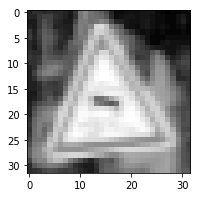

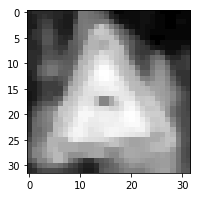

In [17]:
rando = random.choice(range(n_train))

image = X_train_pp[rando].squeeze()
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')

blur_image = blur_me(X_train_pp[rando])
plt.figure(figsize=(3,3))
plt.imshow(blur_image, cmap='gray')

15 - Next, I have an augmentation method that erodes the image.

In [18]:
def erode_me(img):
    kernel = np.ones((2,2),np.uint8)
    return cv2.erode(img,kernel,iterations = 1)


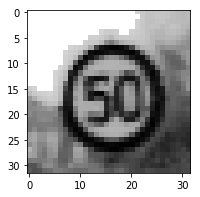

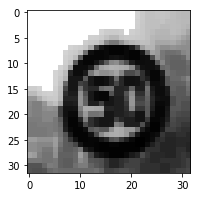

In [19]:
rando = random.choice(range(n_train))

image = X_train_pp[rando].squeeze()
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')

noisy_image = erode_me(image)
plt.figure(figsize=(3,3))
plt.imshow(noisy_image, cmap='gray')

16 - Lastly, I developed a function that tilts the image to the left or right by some small, random amount.

In [20]:
def skew_me(img):
    # this choice variable either makes the image skew left or right
    choice = random.choice([0,1])
    if choice == 0:
        # this array represents the starting point of the original image
        tri = [0,0,32,0,16,32]
        # we choose a random rate between 1 and 3
        rate = random.choice(range(1,4))
        tri[1] = tri[1] + rate
        tri[2] = tri[2] + rate
        tri[5] = tri[5] - rate
        rows,cols,ch = img.shape
        # pts1 represents the starting coordinates of the original image
        pts1 = np.float32([[0,0],[32,0],[16,32]])
        # pts2 represents the ending coordinates of the transformed image
        pts2 = np.float32([[tri[0], tri[1]],[tri[2], tri[3]],[tri[4],tri[5]]])
        M = cv2.getAffineTransform(pts1,pts2)
        return cv2.warpAffine(img,M,(cols,rows))
    else:
        # this array represents the starting point of the original image
        tri = [0,0,32,0,16,32]
        # we choose a random rate between 1 and 3
        rate = random.choice(range(1,4))
        tri[1] = tri[1] - rate
        tri[2] = tri[2] - rate
        tri[5] = tri[5] + rate
        rows,cols,ch = img.shape
        # pts1 represents the starting coordinates of the original image
        pts1 = np.float32([[0,0],[32,0],[16,32]])
        # pts2 represents the ending coordinates of the transformed image
        pts2 = np.float32([[tri[0], tri[1]],[tri[2], tri[3]],[tri[4],tri[5]]])
        M = cv2.getAffineTransform(pts1,pts2)
        return cv2.warpAffine(img,M,(cols,rows))


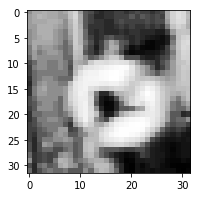

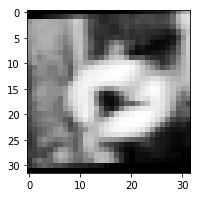

In [21]:
rando = random.choice(range(n_train))

image = X_train_pp[rando].squeeze()
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')

skewed = skew_me(X_train_pp[rando])
plt.figure(figsize=(3,3))
plt.imshow(skewed, cmap='gray')

17 - Now we build a function that notes, for each Class ID, how many fewer than the max count they have, and then goes about creating that amount of augmented copies of original images.

In [22]:
# For each class_id, in the amount of count_needed, we want to generate an augmented copy 
# (of some random type) of an original member of that class) AND add a tick to the counter 
# of that class_id in the respective label class (of train, valid, test)
# such that each class will have the same amount of examples (namely, the max of the set).

def balance_class(X, counts, indices):
    balance_x = []
    balance_y = []
    for i in range(n_classes):
        counter = 1
        this_count_needed = counts[i] + 1
        while counter < this_count_needed:
            augment_method = random.choice([1,2,3])
            chosen_image = random.choice(indices[i])
            if augment_method == 1:
                new_image = blur_me(X[chosen_image])
            elif augment_method == 2:
                new_image = erode_me(X[chosen_image])
            else:
                new_image = skew_me(X[chosen_image])
            balance_x.append(new_image)
            balance_y.append(i)
            counter += 1
    return balance_x, balance_y

18 - We determine the number of images needed for each class ID (by subtracting each count from the max) and run balance_class() on the training sets.

In [23]:
train_count_needed = [(max(train_id_counts) - i) for i in train_id_counts]

print(train_count_needed)

# train_indices were collected above at cell 3 when the datasets were first being analyzed / visualized
augmented_X_train, augmented_y_train = balance_class(X_train, train_count_needed, train_indices)

# For some reason which I have been unable to determine and don't want to spend the time to look into, 
# my balance_class method returns the original 3-color image array with the same shape that is fed in, whereas
# when I preprocess the images first and then use balance_class, it removes the last element of the array --
# in other words, transforms (32, 32, 1) to just (32, 32). Thus, even though conceptually I am
# preprocessing the images first and then balancing them, in fact I need to do it in the reverse order... :/
augmented_X_train = preprocess(augmented_X_train)

[1830, 30, 0, 750, 240, 360, 1650, 720, 750, 690, 210, 840, 120, 90, 1320, 1470, 1650, 1020, 930, 1830, 1710, 1740, 1680, 1560, 1770, 660, 1470, 1800, 1530, 1770, 1620, 1320, 1800, 1411, 1650, 930, 1680, 1830, 150, 1740, 1710, 1800, 1800]


19 - We then concatenate the augmented sets to the originals. The lengths of the separate and concatenated sets are included as a check.

In [24]:
print(len(X_train_pp))
print(len(augmented_X_train))

new_X_train = np.concatenate((X_train_pp, augmented_X_train))
new_y_train = np.concatenate((y_train, augmented_y_train))

print(len(new_X_train))

34799
51631
86430


20 - We look at a random member of the concatenated set and compare it to its associated label in the augmented y set to verify that the function worked as planned.

4


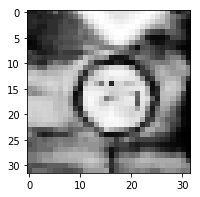

In [25]:
rando = random.choice(range(len(new_y_train)))
print(new_y_train[rando])

image = new_X_train[rando].squeeze()
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')

21 - Looks good! Then we run the same analysis applied above to the training set on the new, concatenated sets to make sure they are of the expected size and distribution.

In [26]:
# The Class ID max count for this set was 2010 examples (for Class ID 2: Speed limit (50km/h).)
# We expect the number of classes to still be 43, and for both the new_X_train and new_y_train
# to be size 43 * 2010 = 86,430

# capture the number of training examples
n_new_train = new_X_train.shape[0]

# capture the number of training labels
n_new_labels = new_y_train.shape[0]

# capture the number of unique classes/labels in the dataset
n_new_classes = len(np.unique(new_y_train))

# print out results of the above
print("Number of combined training examples =", n_new_train)
print("Number of combined training labels =", n_new_labels)
print("Number of classes =", n_new_classes)

Number of combined training examples = 86430
Number of combined training labels = 86430
Number of classes = 43


[2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010]


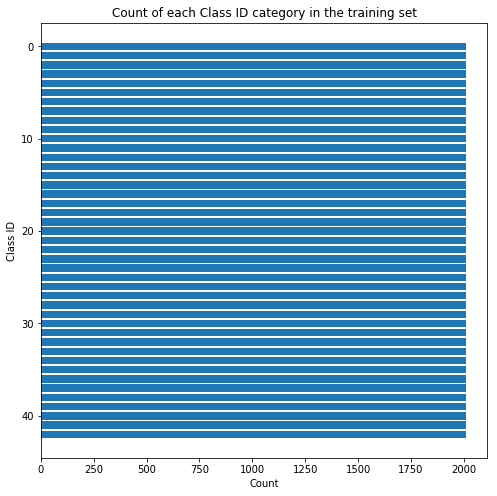

In [27]:
# Repeating the steps from above as verification:
# Provide an exploratory visualization of the dataset
# Part A: Bar chart showing the count of each class

counter = 0
# class_id_counts is initialized as an array of 0's, 43 positions long, one for each class
# the value at each position is intended to hold the count of that class ID
train_id_counts = 43 * [0]
# train_indices is intitialized as a list of blank lists, 43 positions long, one for each class ID
# the list at each of these positions is intended to hold the indexes of all members of 
# that class ID
train_indices = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
             [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

# go through every member of the training dataset, starting at 0
while counter < n_new_train:
    # grab the class ID of dataset member 'counter' from y_train
    class_id = new_y_train[counter]
    # increase the count of this class ID by 1
    train_id_counts[class_id] = train_id_counts[class_id] + 1
    # add dataset member 'counter' to the list of indices of that class ID
    train_indices[class_id].append(counter)
    counter += 1
    
print(train_id_counts)

# set variables for spacing on the y axis of the bar graph
counts = tuple(i for i in range(43))
y_pos = np.arange(len(counts)) 

# create the bar graph
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.barh(y_pos, train_id_counts)
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_ylabel('Class ID')
ax.set_title('Count of each Class ID category in the training set')

# show the graph
plt.show()

22 - Looking good! : ) Now we repeat the above processes for the validation set...

[30, 240, 240, 150, 210, 210, 60, 150, 150, 150, 210, 150, 210, 240, 90, 90, 60, 120, 120, 30, 60, 60, 60, 60, 30, 150, 60, 30, 60, 30, 60, 90, 30, 90, 60, 120, 60, 30, 210, 30, 60, 30, 30]


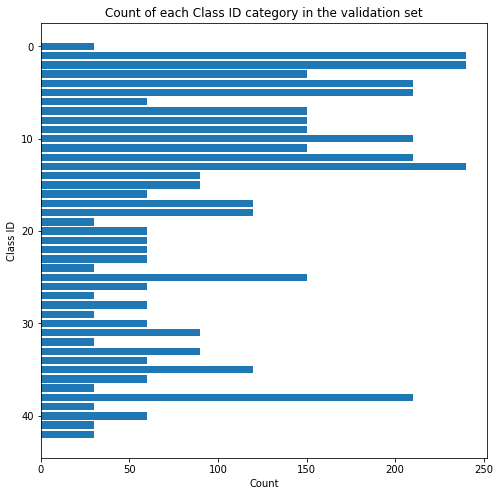

In [28]:
# Repeating the steps from above for the validation set...

counter = 0
# valid_id_counts is initialized as an array of 0's, 43 positions long, one for each class
# the value at each position is intended to hold the count of that class ID
valid_id_counts = 43 * [0]
# valid_indices is intitialized as a list of blank lists, 43 positions long, one for each class ID
# the list at each of these positions is intended to hold the indexes of all members of 
# that class ID
valid_indices = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
             [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

# go through every member of the validation dataset, starting at 0
while counter < n_valid:
    # grab the class ID of dataset member 'counter' from y_valid
    class_id = y_valid[counter]
    # increase the count of this class ID by 1
    valid_id_counts[class_id] = valid_id_counts[class_id] + 1
    # add dataset member 'counter' to the list of indices of that class ID
    valid_indices[class_id].append(counter)
    counter += 1
    
print(valid_id_counts)

# set variables for spacing on the y axis of the bar graph
counts = tuple(i for i in range(43))
y_pos = np.arange(len(counts)) 

# create the bar graph
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.barh(y_pos, valid_id_counts)
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_ylabel('Class ID')
ax.set_title('Count of each Class ID category in the validation set')

# show the graph
plt.show()

In [29]:
valid_count_needed = [(max(valid_id_counts) - i) for i in valid_id_counts]

print(valid_count_needed)

augmented_X_valid, augmented_y_valid = balance_class(X_valid, valid_count_needed, valid_indices)

# see above to read about why I repeat the preprocessing step after invoking balance_class()
augmented_X_valid = preprocess(augmented_X_valid)

[210, 0, 0, 90, 30, 30, 180, 90, 90, 90, 30, 90, 30, 0, 150, 150, 180, 120, 120, 210, 180, 180, 180, 180, 210, 90, 180, 210, 180, 210, 180, 150, 210, 150, 180, 120, 180, 210, 30, 210, 180, 210, 210]


In [30]:
print(len(X_valid_pp))
print(len(augmented_X_valid))

new_X_valid = np.concatenate((X_valid_pp, augmented_X_valid))
new_y_valid = np.concatenate((y_valid, augmented_y_valid))

print(len(new_X_valid))

n_new_valid = new_X_valid.shape[0]

4410
5910
10320


[240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240]


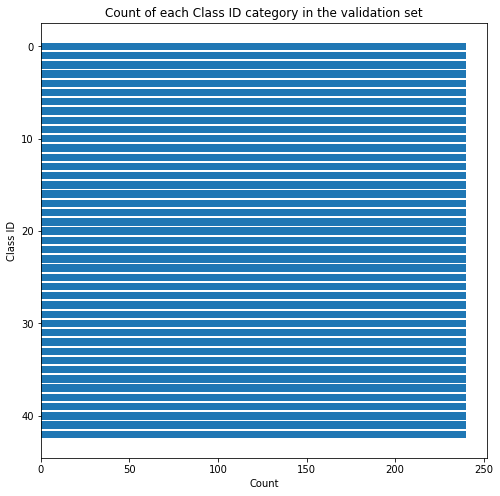

In [31]:
# Verifying augmented validation set...

counter = 0
# valid_id_counts is initialized as an array of 0's, 43 positions long, one for each class
# the value at each position is intended to hold the count of that class ID
valid_id_counts = 43 * [0]
# valid_indices is intitialized as a list of blank lists, 43 positions long, one for each class ID
# the list at each of these positions is intended to hold the indexes of all members of 
# that class ID
valid_indices = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
             [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

# go through every member of the validation dataset, starting at 0
while counter < n_new_valid:
    # grab the class ID of dataset member 'counter' from y_valid
    class_id = new_y_valid[counter]
    # increase the count of this class ID by 1
    valid_id_counts[class_id] = valid_id_counts[class_id] + 1
    # add dataset member 'counter' to the list of indices of that class ID
    valid_indices[class_id].append(counter)
    counter += 1
    
print(valid_id_counts)

# set variables for spacing on the y axis of the bar graph
counts = tuple(i for i in range(43))
y_pos = np.arange(len(counts)) 

# create the bar graph
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.barh(y_pos, valid_id_counts)
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_ylabel('Class ID')
ax.set_title('Count of each Class ID category in the validation set')

# show the graph
plt.show()

23 - Another sanity check...

13


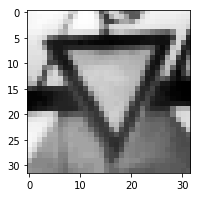

In [32]:
rando = random.choice(range(len(new_y_valid)))
print(new_y_valid[rando])

image = new_X_valid[rando].squeeze()
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')

24 - Seems legit. 

And lastly the same process applied to the test set...

[60, 720, 750, 450, 660, 630, 150, 450, 450, 480, 660, 420, 690, 720, 270, 210, 150, 360, 390, 60, 90, 90, 120, 150, 90, 480, 180, 60, 150, 90, 150, 270, 60, 210, 120, 390, 120, 60, 690, 90, 90, 60, 90]


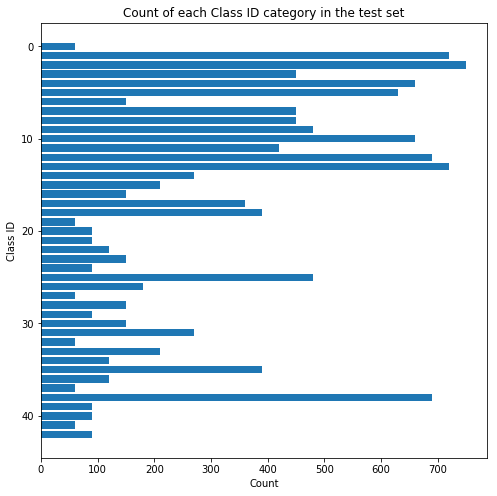

In [33]:
# Repeating the steps from above for test set...

counter = 0
# test_id_counts is initialized as an array of 0's, 43 positions long, one for each class
# the value at each position is intended to hold the count of that class ID
test_id_counts = 43 * [0]
# test_indices is intitialized as a list of blank lists, 43 positions long, one for each class ID
# the list at each of these positions is intended to hold the indexes of all members of 
# that class ID
test_indices = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
             [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

# go through every member of the validation dataset, starting at 0
while counter < n_test:
    # grab the class ID of dataset member 'counter' from y_valid
    class_id = y_test[counter]
    # increase the count of this class ID by 1
    test_id_counts[class_id] = test_id_counts[class_id] + 1
    # add dataset member 'counter' to the list of indices of that class ID
    test_indices[class_id].append(counter)
    counter += 1
    
print(test_id_counts)

# set variables for spacing on the y axis of the bar graph
counts = tuple(i for i in range(43))
y_pos = np.arange(len(counts)) 

# create the bar graph
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.barh(y_pos, test_id_counts)
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_ylabel('Class ID')
ax.set_title('Count of each Class ID category in the test set')

# show the graph
plt.show()

In [34]:
test_count_needed = [(max(test_id_counts) - i) for i in test_id_counts]

print(test_count_needed)

augmented_X_test, augmented_y_test = balance_class(X_test, test_count_needed, test_indices)

# see above to read about why I repeat the preprocessing step after invoking balance_class()
augmented_X_test = preprocess(augmented_X_test)

[690, 30, 0, 300, 90, 120, 600, 300, 300, 270, 90, 330, 60, 30, 480, 540, 600, 390, 360, 690, 660, 660, 630, 600, 660, 270, 570, 690, 600, 660, 600, 480, 690, 540, 630, 360, 630, 690, 60, 660, 660, 690, 660]


In [35]:
print(len(X_test))
print(len(augmented_X_test))

new_X_test = np.concatenate((X_test_pp, augmented_X_test))
new_y_test = np.concatenate((y_test, augmented_y_test))

print(len(new_X_test))

n_new_test = new_X_test.shape[0]

12630
19620
32250


[750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750]


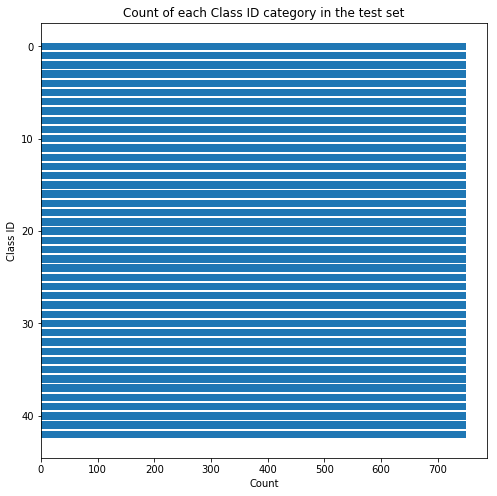

In [36]:
# Verifying augmented test set...

counter = 0
# test_id_counts is initialized as an array of 0's, 43 positions long, one for each class
# the value at each position is intended to hold the count of that class ID
test_id_counts = 43 * [0]
# test_indices is intitialized as a list of blank lists, 43 positions long, one for each class ID
# the list at each of these positions is intended to hold the indexes of all members of 
# that class ID
test_indices = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
             [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

# go through every member of the validation dataset, starting at 0
while counter < n_new_test:
    # grab the class ID of dataset member 'counter' from y_valid
    class_id = new_y_test[counter]
    # increase the count of this class ID by 1
    test_id_counts[class_id] = test_id_counts[class_id] + 1
    # add dataset member 'counter' to the list of indices of that class ID
    test_indices[class_id].append(counter)
    counter += 1
    
print(test_id_counts)

# set variables for spacing on the y axis of the bar graph
counts = tuple(i for i in range(43))
y_pos = np.arange(len(counts)) 

# create the bar graph
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.barh(y_pos, test_id_counts)
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_ylabel('Class ID')
ax.set_title('Count of each Class ID category in the test set')

# show the graph
plt.show()

25 - A final sanity check...

24


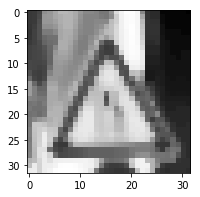

In [37]:
rando = random.choice(range(len(new_y_test)))
print(new_y_test[rando])

image = new_X_test[rando].squeeze()
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')

26 - Okay! Everything looks good...

Let's rerun our model on these balanced, augmented datasets.

In [38]:
rate = 0.001
EPOCHS = 30
BATCH_SIZE = 32

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(new_X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        new_X_train, new_y_train = shuffle(new_X_train, new_y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = new_X_train[offset:end], new_y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(new_X_valid, new_y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.881

EPOCH 2 ...
Validation Accuracy = 0.881

EPOCH 3 ...
Validation Accuracy = 0.870

EPOCH 4 ...
Validation Accuracy = 0.865

EPOCH 5 ...
Validation Accuracy = 0.887

EPOCH 6 ...
Validation Accuracy = 0.904

EPOCH 7 ...
Validation Accuracy = 0.900

EPOCH 8 ...
Validation Accuracy = 0.887

EPOCH 9 ...
Validation Accuracy = 0.888

EPOCH 10 ...
Validation Accuracy = 0.908

EPOCH 11 ...
Validation Accuracy = 0.908

EPOCH 12 ...
Validation Accuracy = 0.891

EPOCH 13 ...
Validation Accuracy = 0.909

EPOCH 14 ...
Validation Accuracy = 0.910

EPOCH 15 ...
Validation Accuracy = 0.908

EPOCH 16 ...
Validation Accuracy = 0.903

EPOCH 17 ...
Validation Accuracy = 0.894

EPOCH 18 ...
Validation Accuracy = 0.910

EPOCH 19 ...
Validation Accuracy = 0.930

EPOCH 20 ...
Validation Accuracy = 0.885

EPOCH 21 ...
Validation Accuracy = 0.907

EPOCH 22 ...
Validation Accuracy = 0.905

EPOCH 23 ...
Validation Accuracy = 0.901

EPOCH 24 ...
Validation Accura

27 - Oh, ok. So all that work led to a worse-performing model; awesome... 🙄

Well, if nothing else, I'm sure that this will be an oft-encountered state of affairs in this field, so this has been a valuable experience. 😊

I suspect that my method of addressing balancing via augmentation is to blame (I guess there's a reason it's unheard of, ha.) It probably would have been better just to create balanced classes of augmented images and throw out the originals, as Sermanet + LeCun did. However, seeing as my model achieved > 0.93 on the original validation set, I will not be going about implementing their approach at the moment. 😁 

Moving on... I'm going to retrain the model on our original grayscaled, normalized dataset, at which point, we will be at last ready to verify on our test set. Fingers crossed!

In [39]:
rate = 0.001
EPOCHS = 30
BATCH_SIZE = 32

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_pp)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_pp, y_train = shuffle(X_train_pp, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_pp[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_pp, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.831

EPOCH 2 ...
Validation Accuracy = 0.842

EPOCH 3 ...
Validation Accuracy = 0.874

EPOCH 4 ...
Validation Accuracy = 0.882

EPOCH 5 ...
Validation Accuracy = 0.896

EPOCH 6 ...
Validation Accuracy = 0.901

EPOCH 7 ...
Validation Accuracy = 0.910

EPOCH 8 ...
Validation Accuracy = 0.880

EPOCH 9 ...
Validation Accuracy = 0.922

EPOCH 10 ...
Validation Accuracy = 0.902

EPOCH 11 ...
Validation Accuracy = 0.890

EPOCH 12 ...
Validation Accuracy = 0.917

EPOCH 13 ...
Validation Accuracy = 0.894

EPOCH 14 ...
Validation Accuracy = 0.907

EPOCH 15 ...
Validation Accuracy = 0.902

EPOCH 16 ...
Validation Accuracy = 0.920

EPOCH 17 ...
Validation Accuracy = 0.916

EPOCH 18 ...
Validation Accuracy = 0.919

EPOCH 19 ...
Validation Accuracy = 0.937

EPOCH 20 ...
Validation Accuracy = 0.920

EPOCH 21 ...
Validation Accuracy = 0.904

EPOCH 22 ...
Validation Accuracy = 0.934

EPOCH 23 ...
Validation Accuracy = 0.919

EPOCH 24 ...
Validation Accura

28 - Okeydoke. It's the moment of truth...

In [40]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_pp, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.913


29 - Hm... Not fantastic, but good enough!! haha

Now we apply this model to our downloaded German traffic sign images. First, let's load the images and take a look at them. (I was going to follow the directions and only download five sign images, but once I started checking off the Class IDs, I had a hard time stopping, and ended up collecting 36 out of the 43 classes in all. : )

In [42]:
# these numbers are the Class IDs of all the German traffic sign images I was able to locate
download_nos = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,21,22,23,25,26,28,29,30,33,34,35,36,37,38,39,40,41,42]
download_X = []

for no in download_nos:
    image_name = 'traffic-signs-pics/' + str(no) + '.jpg'
    image = cv2.imread(image_name).squeeze()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    download_X.append(image)


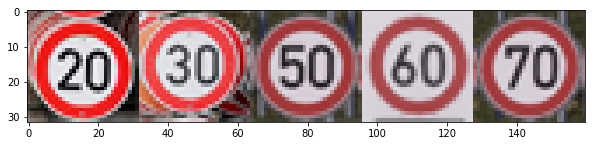

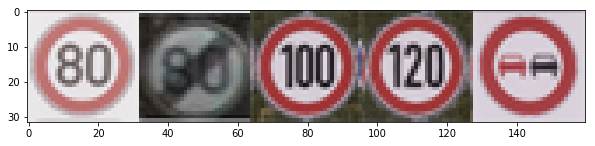

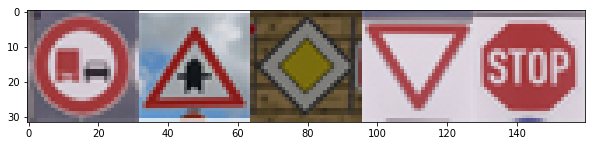

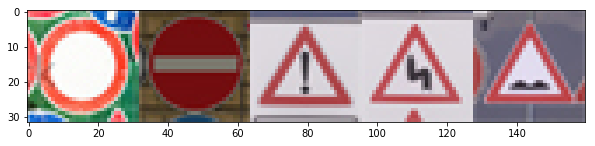

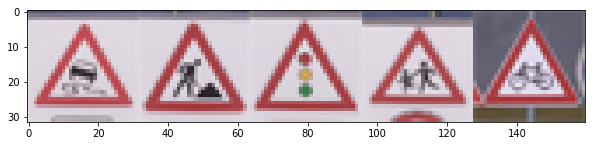

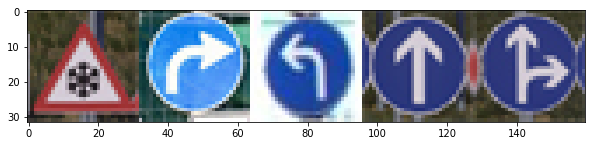

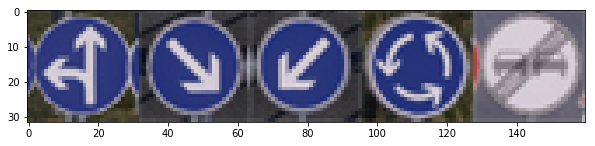

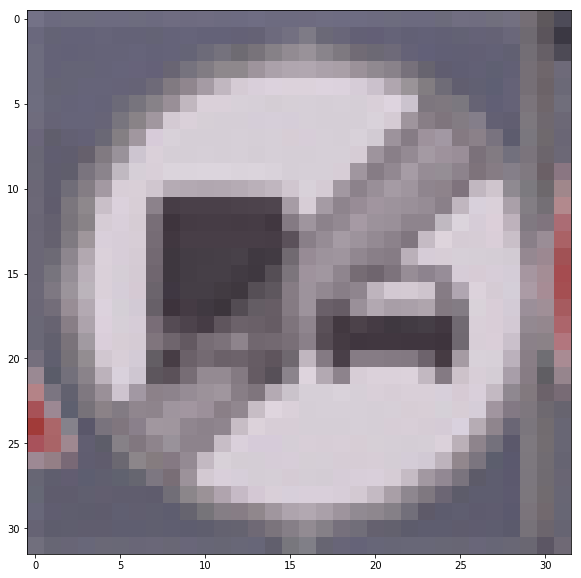

In [43]:
# Create a grid displaying our downloaded traffic sign images
x_var = 0
y_var = 5

# do the following 9 times
for i in range(8):
    # concatenate the next 5 images into one image
    # and display it
    res = np.concatenate(download_X[x_var:y_var], axis=1)
    plt.figure(figsize=(10,10))
    plt.imshow(res)
    # update all vars
    x_var += 5
    y_var += 5

plt.show()

30 - I took care of the image cropping and resizing myself ahead of time in Photoshop.

As can be seen, these images are pretty ideal / sanitized: They are forward-facing, well-lighted, unobscured... in other words, nothing like examples found in the wild (such as our original datasets are comprised of.) I don't have enough of a sense of such things yet to know whether this means my model will knock them out the park because they're such clear examples, or founder on them because they are so unrealistic, and therefore essentially unseen by the model as of yet.

One of the other main issues is that some of these images were digitally created. Specifically, my 12: Priority Road and 17: No Entry signs were lifted from a screencap of German traffic signs that were created for use in Minecraft, haha! I have no idea what influence this potentially might have on my results, but my gut tells me I should be surprised if the influence is salient.

Anyhoo, let's preprocess them.

In [44]:
download_X = preprocess(download_X)

31 - Verify that the preprocess worked.

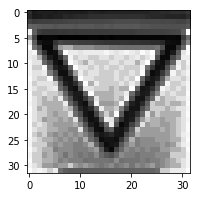

In [45]:
rando = random.choice(range(len(download_X)))

image = download_X[rando].squeeze()
plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')

32 - Looking good... Let's run 'em and see what happens!

In [46]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(download_X, download_nos)
    print("Downloaded Images Accuracy = {:.3f}".format(test_accuracy))


Downloaded Images Accuracy = 0.778


33 - Well, this is considerably worse than our testing accuracy, so I guess that answers the question of whether or not these manicured images would get knocked out the park or not... : /

Let's look at the top five softmax probabilities for each image in the downloaded set, and print them as a pie chart.

In [47]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax = tf.nn.softmax(logits)
    result = sess.run(softmax, feed_dict={x: download_X})
    values, indices = tf.nn.top_k(result, 5)
    probabilities = sess.run(values)
    predictions = sess.run(indices)

Image 0, class ID: 0
   predicted ID : probability
    0 : 0.9802086353
    1 : 0.0144782709
    4 : 0.0049228887
   16 : 0.0003876548
   33 : 0.0000016627



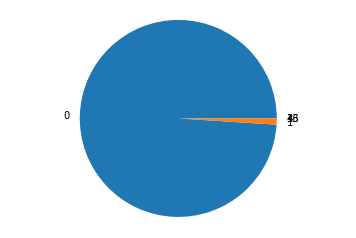

Image 1, class ID: 1
   predicted ID : probability
    1 : 1.0000000000
   12 : 0.0000000291
    4 : 0.0000000019
   35 : 0.0000000001
    2 : 0.0000000001



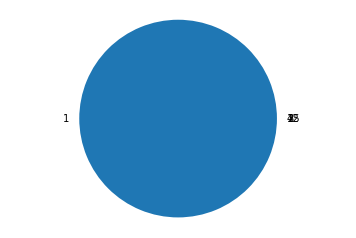

Image 2, class ID: 2
   predicted ID : probability
    2 : 0.9999768734
    1 : 0.0000231219
    5 : 0.0000000000
    4 : 0.0000000000
    8 : 0.0000000000



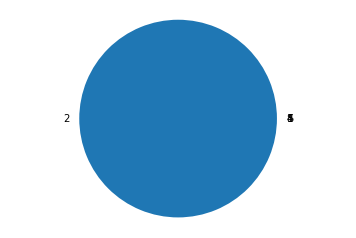

Image 3, class ID: 3
   predicted ID : probability
    3 : 1.0000000000
   35 : 0.0000000000
   38 : 0.0000000000
   20 : 0.0000000000
    5 : 0.0000000000



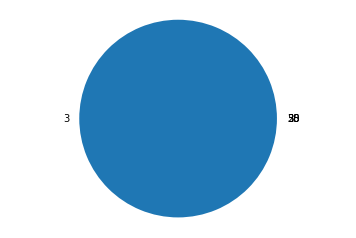

Image 4, class ID: 4
   predicted ID : probability
    4 : 1.0000000000
   16 : 0.0000000511
   10 : 0.0000000000
    0 : 0.0000000000
   33 : 0.0000000000



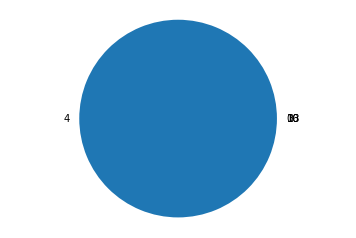

Image 5, class ID: 5
   predicted ID : probability
    2 : 0.8691210151
    1 : 0.1259363741
    5 : 0.0049427175
    4 : 0.0000000002
    3 : 0.0000000001



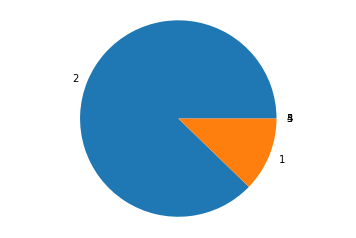

Image 6, class ID: 6
   predicted ID : probability
    6 : 0.9999997616
   32 : 0.0000001860
   41 : 0.0000000000
    5 : 0.0000000000
   42 : 0.0000000000



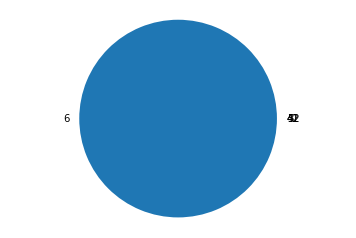

Image 7, class ID: 7
   predicted ID : probability
    1 : 0.9681933522
    7 : 0.0318067186
   40 : 0.0000000033
    5 : 0.0000000000
    8 : 0.0000000000



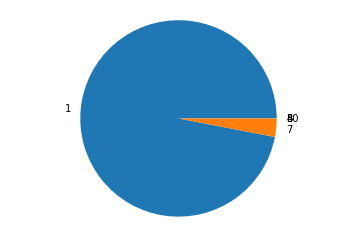

Image 8, class ID: 8
   predicted ID : probability
    0 : 0.9988881946
    1 : 0.0011118313
    5 : 0.0000000001
    4 : 0.0000000000
    8 : 0.0000000000



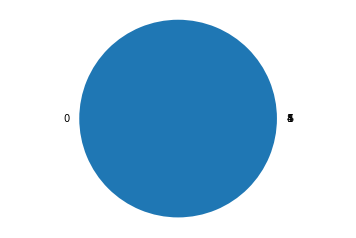

Image 9, class ID: 9
   predicted ID : probability
    9 : 1.0000000000
   16 : 0.0000000062
    7 : 0.0000000000
   15 : 0.0000000000
   28 : 0.0000000000



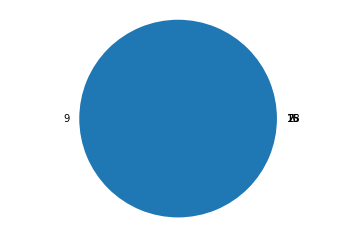

Image 10, class ID: 10
   predicted ID : probability
   10 : 1.0000000000
   11 : 0.0000000000
   42 : 0.0000000000
   20 : 0.0000000000
    9 : 0.0000000000



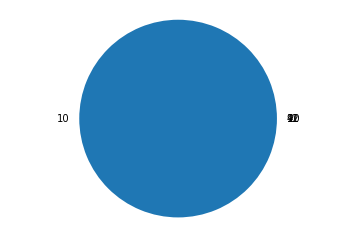

Image 11, class ID: 11
   predicted ID : probability
   11 : 1.0000000000
   21 : 0.0000000000
   27 : 0.0000000000
    0 : 0.0000000000
    1 : 0.0000000000



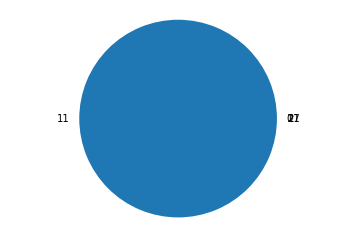

Image 12, class ID: 12
   predicted ID : probability
   12 : 1.0000000000
    0 : 0.0000000000
    1 : 0.0000000000
    2 : 0.0000000000
    3 : 0.0000000000



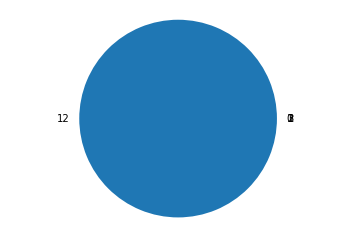

Image 13, class ID: 13
   predicted ID : probability
   13 : 1.0000000000
    0 : 0.0000000000
    1 : 0.0000000000
    2 : 0.0000000000
    3 : 0.0000000000



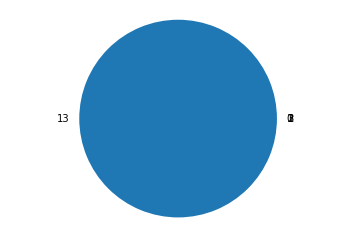

Image 14, class ID: 14
   predicted ID : probability
   14 : 1.0000000000
   40 : 0.0000000000
   38 : 0.0000000000
   34 : 0.0000000000
    9 : 0.0000000000



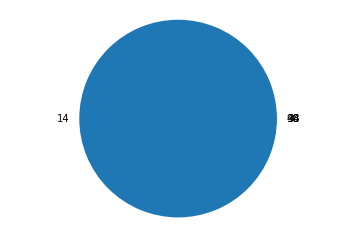

Image 15, class ID: 15
   predicted ID : probability
    7 : 0.5793821216
    8 : 0.4123633504
   15 : 0.0079651522
   12 : 0.0002893180
    5 : 0.0000000855



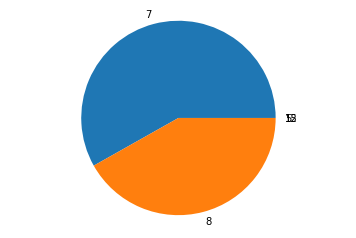

Image 16, class ID: 17
   predicted ID : probability
   17 : 1.0000000000
    0 : 0.0000000000
    1 : 0.0000000000
    2 : 0.0000000000
    3 : 0.0000000000



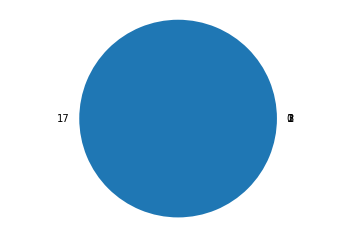

Image 17, class ID: 18
   predicted ID : probability
   18 : 1.0000000000
    0 : 0.0000000000
    1 : 0.0000000000
    2 : 0.0000000000
    3 : 0.0000000000



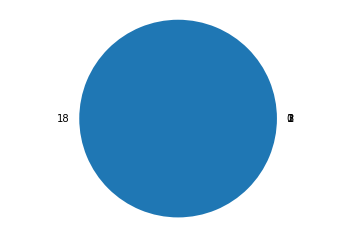

Image 18, class ID: 21
   predicted ID : probability
   19 : 0.9022461176
   21 : 0.0977538303
   25 : 0.0000000000
    2 : 0.0000000000
   11 : 0.0000000000



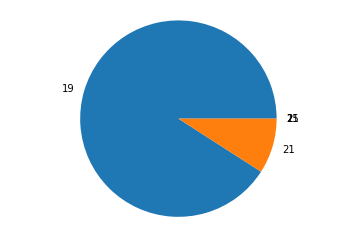

Image 19, class ID: 22
   predicted ID : probability
   22 : 1.0000000000
   28 : 0.0000000000
    0 : 0.0000000000
    1 : 0.0000000000
    2 : 0.0000000000



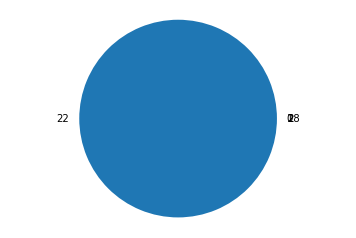

Image 20, class ID: 23
   predicted ID : probability
   23 : 0.9996944666
   21 : 0.0003055994
   19 : 0.0000000000
   11 : 0.0000000000
   30 : 0.0000000000



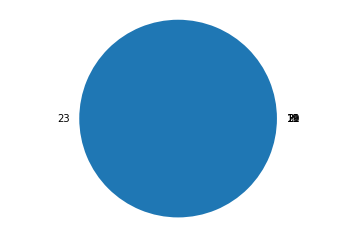

Image 21, class ID: 25
   predicted ID : probability
   25 : 1.0000000000
   20 : 0.0000000000
   13 : 0.0000000000
   35 : 0.0000000000
   22 : 0.0000000000



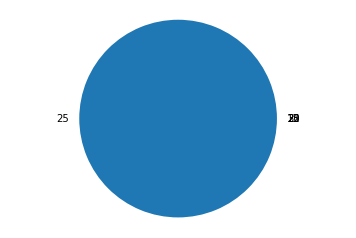

Image 22, class ID: 26
   predicted ID : probability
   26 : 1.0000000000
   18 : 0.0000000000
   31 : 0.0000000000
   27 : 0.0000000000
   20 : 0.0000000000



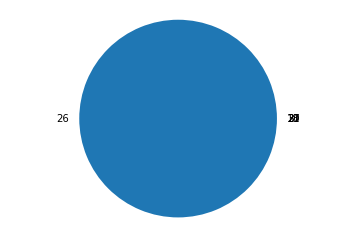

Image 23, class ID: 28
   predicted ID : probability
   28 : 1.0000000000
   35 : 0.0000000000
   29 : 0.0000000000
   12 : 0.0000000000
   34 : 0.0000000000



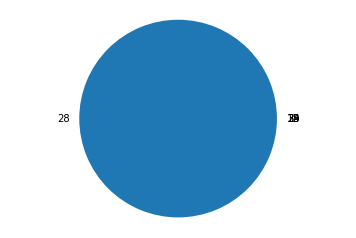

Image 24, class ID: 29
   predicted ID : probability
   23 : 0.6268247366
   21 : 0.2507945597
   31 : 0.1222443059
   19 : 0.0000643230
   29 : 0.0000584195



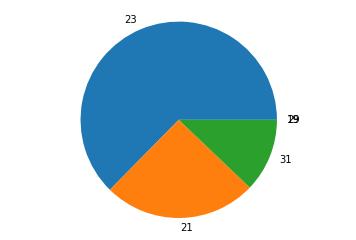

Image 25, class ID: 30
   predicted ID : probability
   11 : 0.9714898467
   21 : 0.0279628076
   38 : 0.0003744848
   35 : 0.0001054528
   30 : 0.0000665442



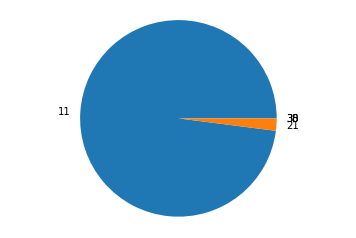

Image 26, class ID: 33
   predicted ID : probability
   33 : 0.9992744327
    4 : 0.0007015084
   14 : 0.0000240413
    1 : 0.0000000382
    0 : 0.0000000004



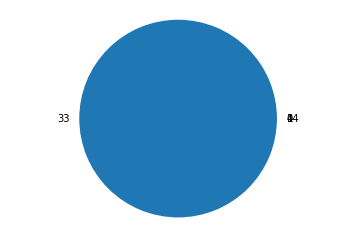

Image 27, class ID: 34
   predicted ID : probability
   34 : 0.9999997616
   38 : 0.0000002716
   35 : 0.0000000000
   37 : 0.0000000000
   17 : 0.0000000000



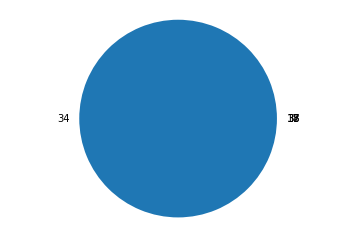

Image 28, class ID: 35
   predicted ID : probability
   35 : 1.0000000000
    9 : 0.0000000000
    0 : 0.0000000000
    1 : 0.0000000000
    2 : 0.0000000000



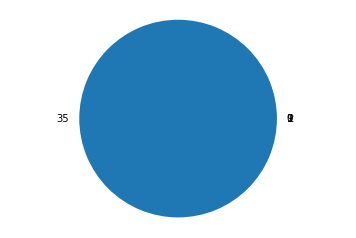

Image 29, class ID: 36
   predicted ID : probability
   36 : 0.9998930693
    5 : 0.0001068453
    8 : 0.0000000799
   15 : 0.0000000032
    2 : 0.0000000012



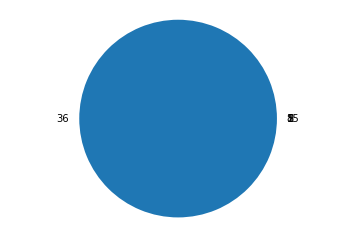

Image 30, class ID: 37
   predicted ID : probability
   17 : 0.9859002233
   37 : 0.0139165930
   12 : 0.0001798243
   35 : 0.0000034000
   13 : 0.0000000408



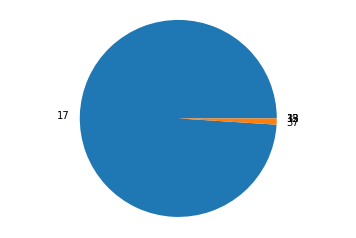

Image 31, class ID: 38
   predicted ID : probability
   38 : 1.0000000000
    0 : 0.0000000000
    1 : 0.0000000000
    2 : 0.0000000000
    3 : 0.0000000000



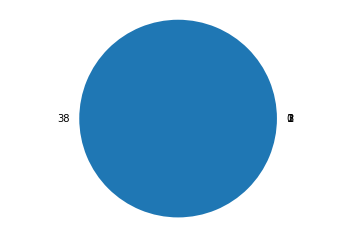

Image 32, class ID: 39
   predicted ID : probability
   39 : 1.0000000000
    8 : 0.0000000026
    2 : 0.0000000002
    1 : 0.0000000000
    7 : 0.0000000000



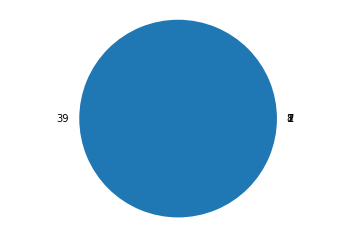

Image 33, class ID: 40
   predicted ID : probability
   40 : 1.0000000000
   10 : 0.0000000000
   17 : 0.0000000000
   12 : 0.0000000000
   42 : 0.0000000000



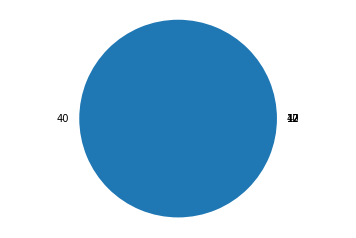

Image 34, class ID: 41
   predicted ID : probability
   41 : 0.9999876022
   12 : 0.0000124481
   20 : 0.0000000000
   40 : 0.0000000000
   32 : 0.0000000000



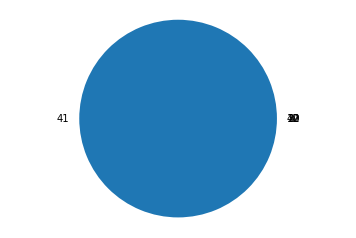

Image 35, class ID: 42
   predicted ID : probability
   42 : 0.9999994040
   10 : 0.0000006387
   20 : 0.0000000004
    7 : 0.0000000000
    9 : 0.0000000000



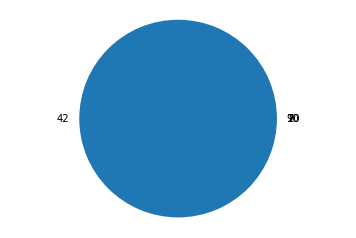

In [49]:
counter = 0

for no in download_nos:
    # make a couple arrays to store pie chart values
    pie_labels = []
    pie_sizes = []
    print("Image " + str(counter) + ", class ID: " + str(no))
    print("   predicted ID : probability")
    for i in range(5):
        pred_class = predictions[counter][i]
        class_prob = "{:.10f}".format(probabilities[counter][i])
        pie_prob = int(probabilities[counter][i] * 100)
        # this if statement just adds an extra space in front of the pred_class
        # if it's a single digit number to make for easier reading...
        if pred_class < 10:
            print("    " + str(pred_class) + " : " + class_prob)
        else:
            print("   " + str(pred_class) + " : " + class_prob)
        # add class ID and probability to respective pie chart arrays
        pie_labels.append(str(pred_class))
        pie_sizes.append(pie_prob)
    print()
    
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    fig, ax = plt.subplots()
    ax.pie(pie_sizes, labels=pie_labels)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
    counter += 1

34 - Of the 36 downloaded images:
- 31 have between 99 and 100% certainty for their top softmax probability
- 4 have non-negligible second place softmax probabilities (classes 2, 5, 7, 14)
- 1 has two non-negligible second place softmax probabilities (class 21)

Not bad!

35 - Let's dig deeper into performance by looking at precision and recall for the test set.

In [50]:
# This time we only look at the single highest softmax probability, rather than the top 5 like before
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax = tf.nn.softmax(logits)
    result = sess.run(softmax, feed_dict={x: X_test_pp})
    values, indices = tf.nn.top_k(result, 1)
    probabilities = sess.run(values)
    predictions = sess.run(indices)

In [51]:
# Collect the data necessary to calculate precision and recall
true_pozzes = 43 * [0]
false_pozzes = 43 * [0]

for i in range(n_test):
    predicted = predictions[i][0]
    actual = y_test[i]
    if predicted == actual:
        true_pozzes[predicted] += 1
    else:
        false_pozzes[predicted] += 1


In [53]:
# Calculate precision and recall for every Class ID
precisions = 43 * [0]
recalls = 43 * [0]

for i in range(n_classes):
    precisions[i] = true_pozzes[i] / (true_pozzes[i] + false_pozzes[i])
    # as a reminder, test_id_counts is an array of the count of each Class ID in the test set
    # thus, this serves as a way of representing the size of the combination of true positives and false negatives
    recalls[i] = (true_pozzes[i] / test_id_counts[i])

In [54]:
# print results
print("Class ID: precision/recalls:")

for i in range(n_classes):
    if i < 10:
        print(" " + str(i) + ": " + str(precisions[i]) + " / " + str(recalls[i]))
    else:
        print(str(i) + ": " + str(precisions[i]) + " / " + str(recalls[i]))

Class ID: precision/recalls:
 0: 0.6666666666666666 / 0.032
 1: 0.9176954732510288 / 0.892
 2: 0.9168797953964194 / 0.956
 3: 0.9117647058823529 / 0.5373333333333333
 4: 0.9277864992150706 / 0.788
 5: 0.8682926829268293 / 0.712
 6: 1.0 / 0.13466666666666666
 7: 0.8415841584158416 / 0.5666666666666667
 8: 0.8850325379609545 / 0.544
 9: 0.9775510204081632 / 0.6386666666666667
10: 0.9597014925373134 / 0.8573333333333333
11: 0.8251028806584362 / 0.5346666666666666
12: 0.9780058651026393 / 0.8893333333333333
13: 0.9821428571428571 / 0.9533333333333334
14: 0.935251798561151 / 0.3466666666666667
15: 0.8087649402390438 / 0.27066666666666667
16: 1.0 / 0.196
17: 1.0 / 0.46
18: 0.9378698224852071 / 0.4226666666666667
19: 0.7843137254901961 / 0.05333333333333334
20: 0.5934065934065934 / 0.072
21: 0.5652173913043478 / 0.104
22: 0.9478260869565217 / 0.14533333333333334
23: 0.8831168831168831 / 0.18133333333333335
24: 0.9649122807017544 / 0.07333333333333333
25: 0.982367758186398 / 0.52
26: 0.9150326

36 - Let's check the same as the above for the downloaded images.

In [55]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax = tf.nn.softmax(logits)
    result = sess.run(softmax, feed_dict={x: download_X})
    values, indices = tf.nn.top_k(result, 1)
    download_probs = sess.run(values)
    download_preds = sess.run(indices)

In [56]:
dl_true_pozzes = 43 * [0]
dl_false_pozzes = 43 * [0]

for i in range(len(download_nos)):
    predicted = download_preds[i][0]
    actual = download_nos[i]
    if predicted == actual:
        dl_true_pozzes[predicted] += 1
    else:
        dl_false_pozzes[predicted] += 1


In [57]:
dl_precisions = 43 * [0]
dl_recalls = 43 * [0]

for i in range(n_classes):
    if (dl_true_pozzes[i] + dl_false_pozzes[i]) != 0:
        dl_precisions[i] = dl_true_pozzes[i] / (dl_true_pozzes[i] + dl_false_pozzes[i])
    else:
        dl_precisions[i] = 0
    # in the case of this downloaded set, because we know that there is only one
    # example of each class ID, 1 will always be the combo of true positives + false negatives
    dl_recalls[i] = (dl_true_pozzes[i] / 1)

In [58]:
print("Downloaded Set IDs: precision/recalls:")

for i in download_nos:
    if i < 10:
        print(" " + str(i) + ": " + str(dl_precisions[i]) + " / " + str(dl_recalls[i]))
    else:
        print(str(i) + ": " + str(dl_precisions[i]) + " / " + str(dl_recalls[i]))

Downloaded Set IDs: precision/recalls:
 0: 0.5 / 1.0
 1: 0.5 / 1.0
 2: 0.5 / 1.0
 3: 1.0 / 1.0
 4: 1.0 / 1.0
 5: 0 / 0.0
 6: 1.0 / 1.0
 7: 0.0 / 0.0
 8: 0 / 0.0
 9: 1.0 / 1.0
10: 1.0 / 1.0
11: 0.5 / 1.0
12: 1.0 / 1.0
13: 1.0 / 1.0
14: 1.0 / 1.0
15: 0 / 0.0
17: 0.5 / 1.0
18: 1.0 / 1.0
21: 0 / 0.0
22: 1.0 / 1.0
23: 0.5 / 1.0
25: 1.0 / 1.0
26: 1.0 / 1.0
28: 1.0 / 1.0
29: 0 / 0.0
30: 0 / 0.0
33: 1.0 / 1.0
34: 1.0 / 1.0
35: 1.0 / 1.0
36: 1.0 / 1.0
37: 0 / 0.0
38: 1.0 / 1.0
39: 1.0 / 1.0
40: 1.0 / 1.0
41: 1.0 / 1.0
42: 1.0 / 1.0


37 - These results highlight the difficulty of extrapolating from N's of 1, but are still interesting nonetheless.

(What follows below was my attempt to satisfy step 4 of the example notebook and Visualize Layers of the Neural Network, but I couldn't successfully resolve the bugs I was receiving and I just can't work on this project any longer right now, so I'm handing it in with this part unfinished, alas... : (

In [59]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [60]:
with tf.Session() as sess:
    # Restore the trained network
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    conv_layer_1 = sess.graph.get_tensor_by_name('conv1:0')
    outputFeatureMap([X_test_pp[4]], conv_layer_1, activation_min=-1, activation_max=-1, plt_num=1)
    plt.show()

KeyError: "The name 'conv1:0' refers to a Tensor which does not exist. The operation, 'conv1', does not exist in the graph."

Many thanks for reading and reviewing my code! : ) Cheers, Graham Arthur Mackenzie